In [37]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Ajusts the configuration of the plots we will create

# Reading in the data
df = pd.read_csv(r'F:\Python Jupyter Project\movies.csv')

In [38]:
# scanning over the data to get an idea
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [39]:
# Looking for some missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [40]:
#  Data types for each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [41]:
# Since there are multiple columns with missing values, its best to drop them rather than modifying them
# because we do not have clear knowledge on those values and you can't just fill them up with aggregate functions

df = df.dropna()

In [42]:
# Changing datatype of columns Budget and gross revenue from float to integer 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [43]:
# There seems to be a mismatch between release data and the year the movie released and hence,
# making a new column with the corrected year

df['year_corrected'] = df['released'].astype(str).str[-20:-15]

In [45]:
# sorting the entire dataset on gross revenue from highest to lowest

df.sort_values(by=['gross'], inplace = True, ascending=False)

In [46]:
# Drop any duplicates if exists, showing unique values of companies in the movie industry
# This is to check if unique values are created for two values of the same company, but were created due to some spelling mistakes

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [47]:
# Our Hypothesis is that budget and company are highly correlated to the gross revenue but we need to check that


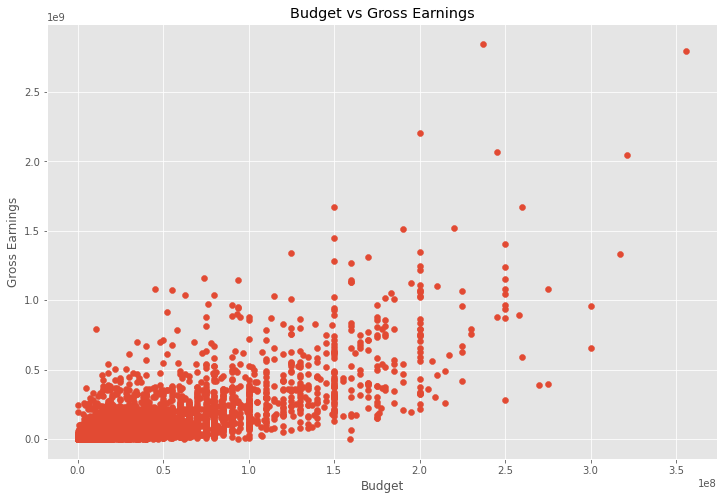

In [48]:
# Scatter plot - Budget Vs Gross Revnue

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

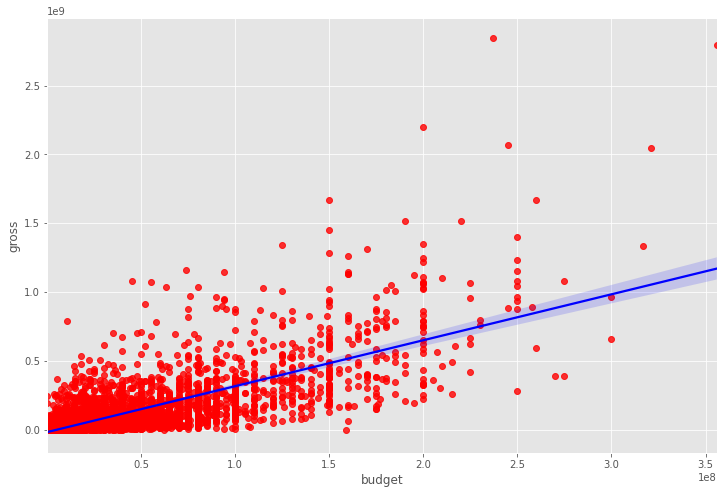

In [49]:
# To get the regression line for the above plot

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [50]:
#Visually, it seems like Budget and Gross are positively correlated, however, we get a better piture
#when we look at the actual value

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [51]:
# There seems to be a high correlation between budget and gross and that proves we are right about that hypothesis


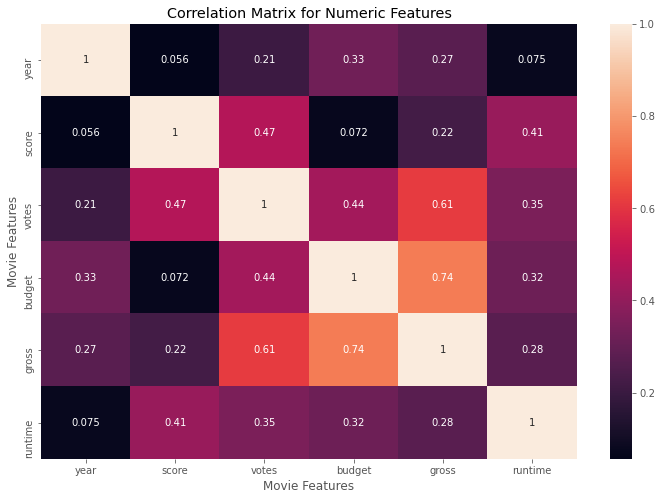

In [52]:
# Plotting a Heatmap for better and comprehensible visualization

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [53]:
# Since company is a categorical variable, in order to find the correlation between them.
# lets convert company to dummy variables 

In [54]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes



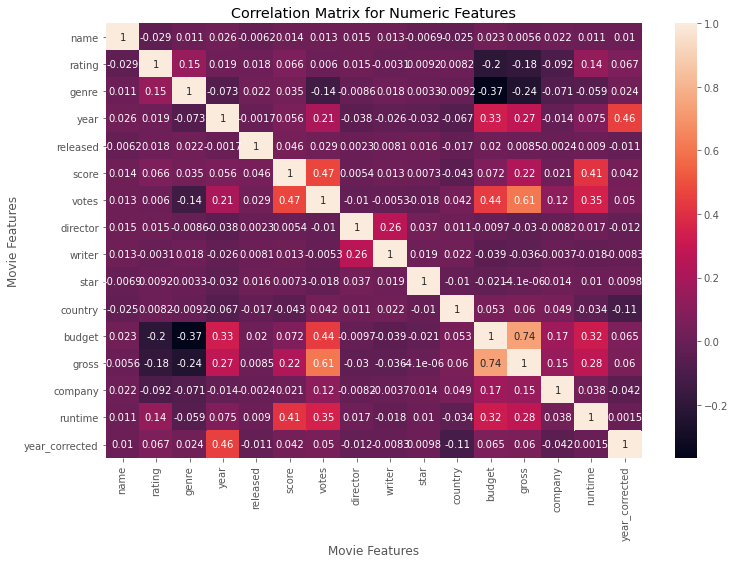

In [55]:
# Plotting heat-map inclusive of all the variables in the data.

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [56]:
#Since the above heat_map contains a lot of variable, it could get quite difficult to interpret the matrix.
#This problem could be solved by unstacking the matrix 

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs


budget          genre            -0.368523
genre           budget           -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
rating          budget           -0.203946
budget          rating           -0.203946
gross           rating           -0.181906
rating          gross            -0.181906
genre           votes            -0.135990
votes           genre            -0.135990
country         year_corrected   -0.114557
year_corrected  country          -0.114557
company         rating           -0.092357
rating          company          -0.092357
genre           year             -0.073167
year            genre            -0.073167
company         genre            -0.071334
genre           company          -0.071334
year            country          -0.066748
country         year             -0.066748
runtime         genre            -0.059237
genre           runtime          -0.059237
country         score            -0.043051
score      

In [57]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

gross           votes             0.614751
votes           gross             0.614751
gross           budget            0.740247
budget          gross             0.740247
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [ ]:
#We observe from the above results that Budget and Votes are highly correlated to gross revenue.
#However, company is not significantly correlated to gross which is against our hypothesis.